In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 

#generate a data set of 20. 
#for simplicity, 10 in the first quadrant, another 10 in the third quadrant 
X1 = []
Y1 = []
X2 = []
Y2 = []

for i in range(10):
    X1.append(random.uniform(0,1))
    Y1.append(random.uniform(0,1))
    X2.append(random.uniform(-1,0))
    Y2.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([1,X1[i],Y1[i],1]) for i in range(10)]
data2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(10)]
data = data1 + data2


In [6]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return 1 if activation >=0 else -1
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True

In [7]:
perceptron = Perceptron(data)
perceptron.fit(data)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [0.         1.31143401 1.11187091]
Number of updates = 2


[1.         0.3341792  0.53552425 1.        ]


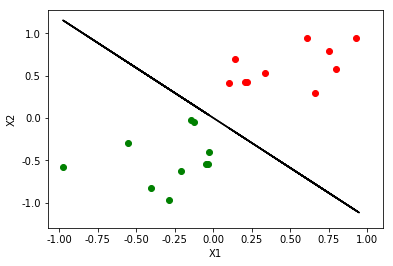

In [8]:
import matplotlib.pyplot as plt

X = np.array(data)[:,0:3]
plt.plot()
print(data[0])

plt.plot(X1, Y1, 'ro')
plt.plot(X2, Y2, 'go')

plt.plot(X, (perceptron.W[0]-perceptron.W[1]*X)/perceptron.W[2], color='black', linestyle='-', label='g(x)')



plt.xlabel("X1");
plt.ylabel("X2");
plt.show()